In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.ma.extras import unique
%matplotlib inline

In [134]:
df = pd.read_csv("17-cardekho.csv")

In [135]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [137]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,9811.86,6.04,55616.48,19.70,1486.06,100.59,5.33,774971.12
std,5643.42,3.01,51618.55,4.17,521.11,42.97,0.81,894128.36
min,0.00,0.00,100.00,4.00,793.00,38.40,0.00,40000.00
25%,4906.50,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,9872.00,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00
75%,14668.50,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,19543.00,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [138]:
pd.set_option("display.float_format","{:.2f}".format)

In [139]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,9811.86,6.04,55616.48,19.70,1486.06,100.59,5.33,774971.12
std,5643.42,3.01,51618.55,4.17,521.11,42.97,0.81,894128.36
min,0.00,0.00,100.00,4.00,793.00,38.40,0.00,40000.00
25%,4906.50,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,9872.00,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00
75%,14668.50,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,19543.00,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [140]:
df["seats"].value_counts()

seats
5    12910
7     1922
8      311
6      127
4       77
9       55
2        7
0        2
Name: count, dtype: int64

In [141]:
df[df["seats"]==0]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3217,4098,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12619,15992,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


In [142]:
df.loc[df["seats"]==0,"seats"] = 5

In [143]:
df[df["seats"]==0]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [144]:
df.duplicated().sum() # 167 tane duplicated satır var.

np.int64(0)

In [145]:
df = df.drop_duplicates(keep="first",ignore_index=True)

In [146]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='vehicle_age', ylabel='selling_price'>

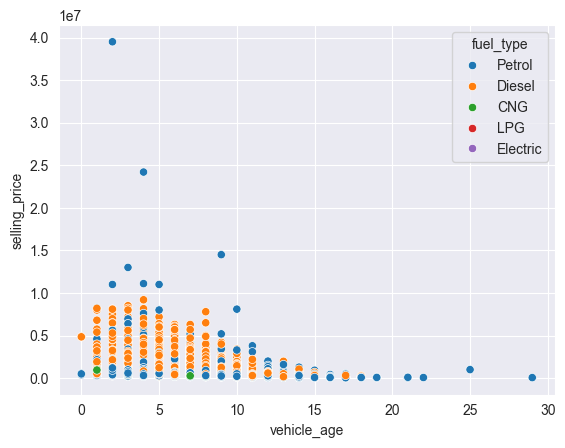

In [147]:
sns.scatterplot(x=df["vehicle_age"], y=df["selling_price"], hue=df["fuel_type"])

In [148]:
df = df[df["selling_price"] <15000000]

<Axes: xlabel='vehicle_age', ylabel='selling_price'>

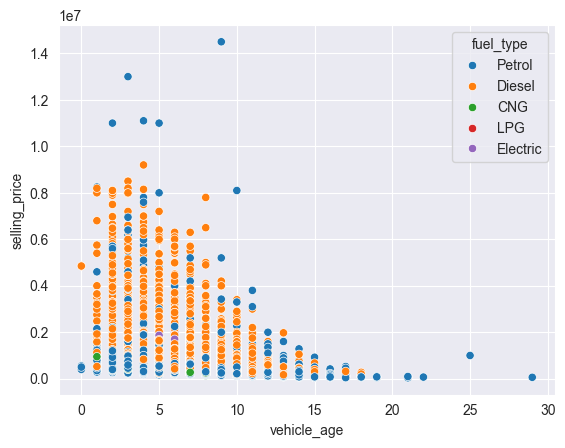

In [149]:
sns.scatterplot(x=df["vehicle_age"], y=df["selling_price"], hue=df["fuel_type"])

<Axes: xlabel='fuel_type', ylabel='selling_price'>

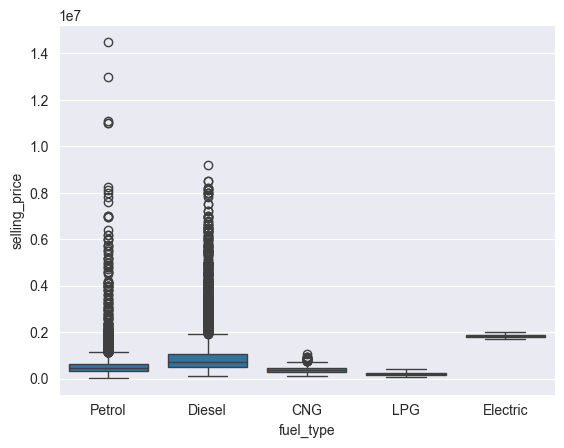

In [150]:
sns.boxplot(data=df,x="fuel_type", y="selling_price")

<Axes: xlabel='km_driven', ylabel='selling_price'>

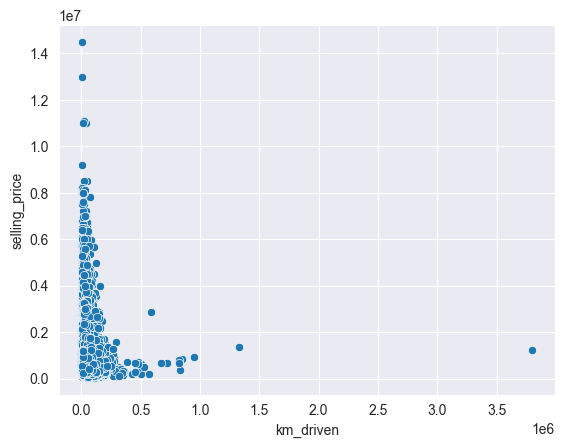

In [151]:
sns.scatterplot(x=df["km_driven"], y=df["selling_price"])

In [152]:
df["km_driven"].max()

np.int64(3800000)

In [153]:
df = df[df["km_driven"] <1000000]

<Axes: xlabel='km_driven', ylabel='selling_price'>

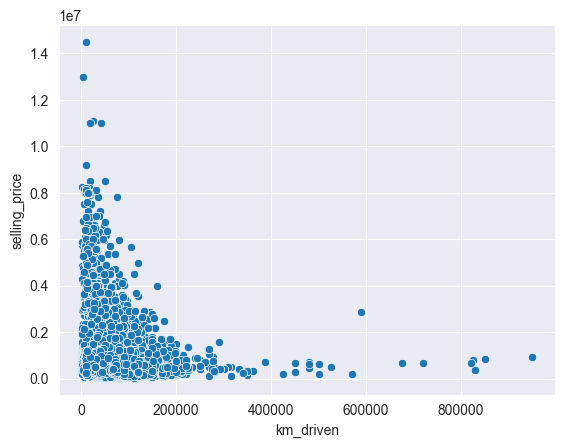

In [154]:
sns.scatterplot(x=df["km_driven"], y=df["selling_price"])

<Axes: xlabel='seats', ylabel='selling_price'>

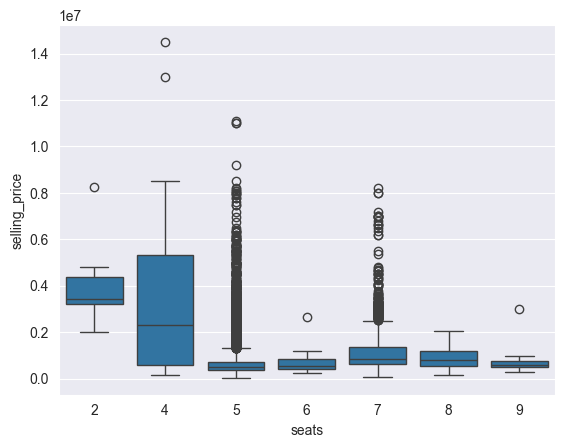

In [155]:
sns.boxplot(data=df,x="seats", y="selling_price")

In [156]:
df.corr(numeric_only=True)

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
Unnamed: 0,1.00,-0.01,-0.02,-0.01,0.01,0.04,-0.03,0.03
vehicle_age,-0.01,1.00,0.42,-0.26,0.10,0.01,0.03,-0.26
km_driven,-0.02,0.42,1.00,-0.13,0.23,0.05,0.23,-0.11
mileage,-0.01,-0.26,-0.13,1.00,-0.63,-0.53,-0.44,-0.32
engine,0.01,0.10,0.23,-0.63,1.00,0.81,0.56,0.61
max_power,0.04,0.01,0.05,-0.53,0.81,1.00,0.18,0.77
seats,-0.03,0.03,0.23,-0.44,0.56,0.18,1.00,0.13
selling_price,0.03,-0.26,-0.11,-0.32,0.61,0.77,0.13,1.00


In [157]:
df = df.drop("Unnamed: 0", axis=1)

In [158]:
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [160]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [161]:
categorical_cols

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [162]:
unique_values_sum = df[categorical_cols].nunique()
unique_values_sum

car_name             119
brand                 30
model                118
seller_type            3
fuel_type              5
transmission_type      2
dtype: int64

In [163]:
# seller_type,fuel_type,transmission_type => one hot encoding
# car_name ,brand,model => frequency encoding

In [164]:
onehot_col = ["seller_type","fuel_type","transmission_type"]
freq_col = ["car_name","brand","model"]

In [165]:
for col in freq_col:
    freq = X_train[col].value_counts() / len(X_train)

    X_train[col + "_freq"] = X_train[col].map(freq)
    X_test[col + "_freq"] = X_test[col].map(freq)

    mean_freq = freq.mean()
    X_test[col + "_freq"] = X_test[col + "_freq"].fillna(mean_freq)

In [171]:
X_train.head()

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
14216,2,8000,Individual,Petrol,Manual,20.30,1086,68.00,5,0.01,0.19,0.01
1250,4,32013,Trustmark Dealer,CNG,Manual,33.54,998,67.04,5,0.05,0.33,0.05
14251,9,74508,Dealer,Diesel,Manual,22.54,1396,88.73,5,0.06,0.19,0.06
6746,5,22000,Dealer,Diesel,Manual,24.00,1120,70.00,5,0.04,0.19,0.04
15159,8,71719,Dealer,Petrol,Manual,18.90,1197,82.00,5,0.04,0.19,0.04


In [167]:
X_test.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
2341,Hyundai Grand,Hyundai,Grand,7,71000,Dealer,Diesel,Manual,24.00,1120,70.00,5,0.04,0.19,0.04
7143,Ford Freestyle,Ford,Freestyle,3,30000,Individual,Petrol,Manual,19.00,1194,94.68,5,0.00,0.05,0.00
5561,Hyundai Verna,Hyundai,Verna,7,68000,Dealer,Diesel,Automatic,19.08,1582,126.32,5,0.03,0.19,0.03
5600,Datsun RediGO,Datsun,RediGO,5,41987,Dealer,Petrol,Manual,22.70,799,53.64,5,0.00,0.01,0.00
7510,Volkswagen Polo,Volkswagen,Polo,4,22815,Dealer,Petrol,Manual,16.47,1198,74.00,5,0.02,0.04,0.02


In [168]:
X_train.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'car_name_freq', 'brand_freq', 'model_freq'],
      dtype='object')

In [169]:
X_train = X_train.drop(["car_name","brand","model"], axis=1)
X_test = X_test.drop(["car_name","brand","model"], axis=1)

In [170]:
X_test.head()

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
2341,7,71000,Dealer,Diesel,Manual,24.00,1120,70.00,5,0.04,0.19,0.04
7143,3,30000,Individual,Petrol,Manual,19.00,1194,94.68,5,0.00,0.05,0.00
5561,7,68000,Dealer,Diesel,Automatic,19.08,1582,126.32,5,0.03,0.19,0.03
5600,5,41987,Dealer,Petrol,Manual,22.70,799,53.64,5,0.00,0.01,0.00
7510,4,22815,Dealer,Petrol,Manual,16.47,1198,74.00,5,0.02,0.04,0.02


In [172]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [173]:
transformer = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop="first",handle_unknown="ignore"),onehot_col)
    ],remainder="passthrough"
)

In [174]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [175]:
encoded_cols = transformer.get_feature_names_out()

In [176]:
encoded_cols

array(['onehot__seller_type_Individual',
       'onehot__seller_type_Trustmark Dealer', 'onehot__fuel_type_Diesel',
       'onehot__fuel_type_Electric', 'onehot__fuel_type_LPG',
       'onehot__fuel_type_Petrol', 'onehot__transmission_type_Manual',
       'remainder__vehicle_age', 'remainder__km_driven',
       'remainder__mileage', 'remainder__engine', 'remainder__max_power',
       'remainder__seats', 'remainder__car_name_freq',
       'remainder__brand_freq', 'remainder__model_freq'], dtype=object)

In [177]:
X_train = pd.DataFrame(X_train, columns=encoded_cols)
X_test = pd.DataFrame(X_test, columns=encoded_cols)

In [179]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11555 entries, 0 to 11554
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   onehot__seller_type_Individual        11555 non-null  float64
 1   onehot__seller_type_Trustmark Dealer  11555 non-null  float64
 2   onehot__fuel_type_Diesel              11555 non-null  float64
 3   onehot__fuel_type_Electric            11555 non-null  float64
 4   onehot__fuel_type_LPG                 11555 non-null  float64
 5   onehot__fuel_type_Petrol              11555 non-null  float64
 6   onehot__transmission_type_Manual      11555 non-null  float64
 7   remainder__vehicle_age                11555 non-null  float64
 8   remainder__km_driven                  11555 non-null  float64
 9   remainder__mileage                    11555 non-null  float64
 10  remainder__engine                     11555 non-null  float64
 11  remainder__max_

In [180]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3852 entries, 0 to 3851
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   onehot__seller_type_Individual        3852 non-null   float64
 1   onehot__seller_type_Trustmark Dealer  3852 non-null   float64
 2   onehot__fuel_type_Diesel              3852 non-null   float64
 3   onehot__fuel_type_Electric            3852 non-null   float64
 4   onehot__fuel_type_LPG                 3852 non-null   float64
 5   onehot__fuel_type_Petrol              3852 non-null   float64
 6   onehot__transmission_type_Manual      3852 non-null   float64
 7   remainder__vehicle_age                3852 non-null   float64
 8   remainder__km_driven                  3852 non-null   float64
 9   remainder__mileage                    3852 non-null   float64
 10  remainder__engine                     3852 non-null   float64
 11  remainder__max_po

In [181]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

In [182]:
model = AdaBoostRegressor()
model.fit(X_train,y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,loss,'linear'
,random_state,None


In [183]:
y_pred = model.predict(X_test)

In [184]:
print("r2",r2_score(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("root_mean_squared_error",root_mean_squared_error(y_test,y_pred))

r2 0.5083320709759982
mean_absolute_error 440551.8428654908
mean_squared_error 274275730708.12915
root_mean_squared_error 523713.4051254838


In [185]:
params = {
    "n_estimators": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "learning_rate": [0.01,0.1,1,2,3,10,100],
    "loss": ["linear","square","exponential"]
}

In [186]:
from sklearn.model_selection import RandomizedSearchCV
rcv = RandomizedSearchCV(estimator=model,param_distributions=params,scoring="r2",cv=5)
rcv.fit(X_train,y_train)

,estimator,AdaBoostRegressor()
,param_distributions,"{'learning_rate': [0.01, 0.1, ...], 'loss': ['linear', 'square', ...], 'n_estimators': [10, 20, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [187]:
rcv.best_params_

{'n_estimators': 60, 'loss': 'exponential', 'learning_rate': 0.1}

In [188]:
y_pred2 = rcv.predict(X_test)
print("r2",r2_score(y_test,y_pred2))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred2))
print("mean_squared_error",mean_squared_error(y_test,y_pred2))

r2 0.7906131340300286
mean_absolute_error 221544.94808951413
mean_squared_error 116805942129.68375


In [189]:
params = {
    "estimator__max_depth": [3,4,5],
    "n_estimators": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "learning_rate": [0.01,0.1,1,2,3,10,100],
    "loss": ["linear","square","exponential"],

}

In [191]:
rcv = RandomizedSearchCV(estimator=AdaBoostRegressor(DecisionTreeRegressor()),param_distributions=params,scoring="r2",cv=5)

In [192]:
rcv.fit(X_train,y_train)

,estimator,AdaBoostRegre...eeRegressor())
,param_distributions,"{'estimator__max_depth': [3, 4, ...], 'learning_rate': [0.01, 0.1, ...], 'loss': ['linear', 'square', ...], 'n_estimators': [10, 20, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [193]:
rcv.best_params_

{'n_estimators': 40,
 'loss': 'exponential',
 'learning_rate': 1,
 'estimator__max_depth': 4}

In [194]:
y_pred3 = rcv.predict(X_test)
print("r2",r2_score(y_test,y_pred3))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred3))
print("mean_squared_error",mean_squared_error(y_test,y_pred3))

r2 0.8017314718286839
mean_absolute_error 233390.3284634455
mean_squared_error 110603605056.28654
